# Data generation and visualization

## Exercise 1
- Generate a dataset drawn from two independent Gaussians, each of which represents a class. You are free to select the number of desired datapoints, the mean and variance of the two distributions.
- Flip randomly a percentage of the labels to introduce some noise and plot the results.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def mixGauss(means, sigmas, n):
    """
    Parameters:
    means: matrix/list of float of dimension n_classes x dim_data
        Means of the Gaussian functions
    sigmas: array/list of float of dimension n_classes
        Standard deviation of the Gaussian functinos
    n: int
        Number of points for each class
    """
    means = np.array(means)
    sigmas = np.array(sigmas)

    dim = np.shape(means)[1]
    num_classes = sigmas.size

    data = np.full(fill_value=np.inf, shape=(n*num_classes, dim))
    labels = np.zeros(n*num_classes)

    for i, _ in enumerate(sigmas):
        data[i*n:(i+1)*n] = np.random.multivariate_normal(means[i],
                                                          np.eye(dim)*sigmas[i]**2, n)
        labels[i*n:(i+1)*n] = i

    return data, labels


def label_noise(p, labels):
    """
    Parameters:
    p: float
        Percentage of labels to flip
    labels: array of int of dimension n_points
        Array containing label indexes
    """
    n = np.shape(labels)[0]
    noisylabels = np.copy(np.squeeze(labels))
    n_flips = int(np.floor(n*p))
    idx_flip = np.random.choice(n, n_flips, False)
    noisylabels[idx_flip] = 1-noisylabels[idx_flip]
    return noisylabels

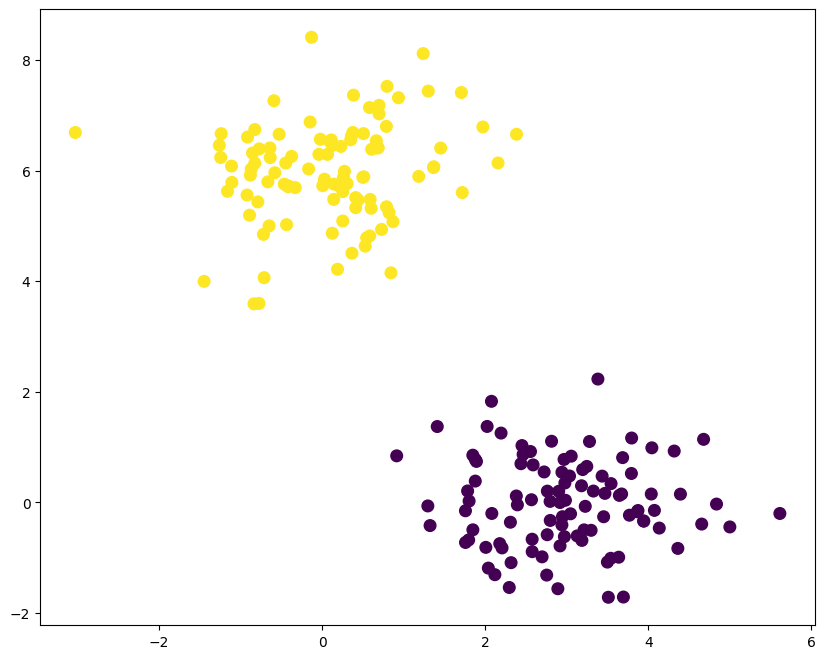

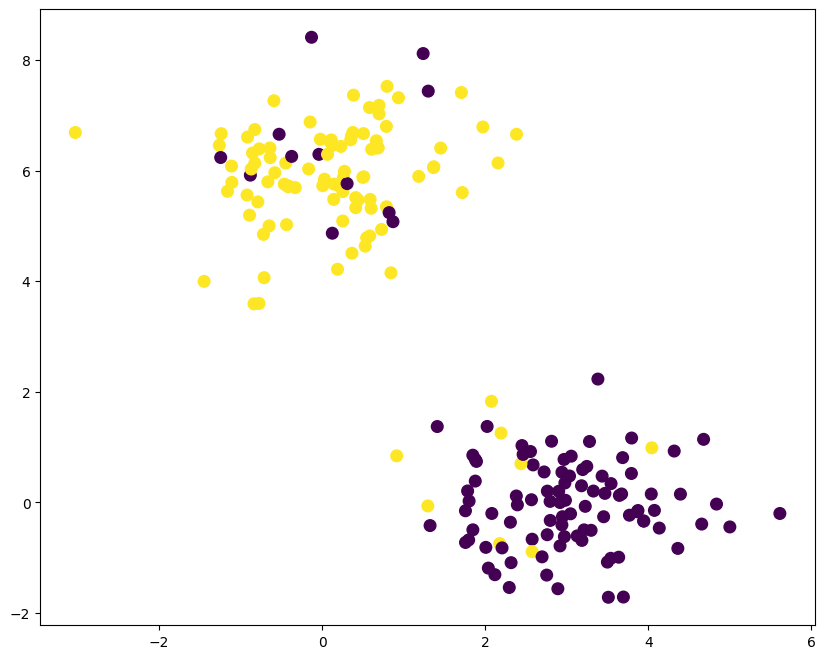

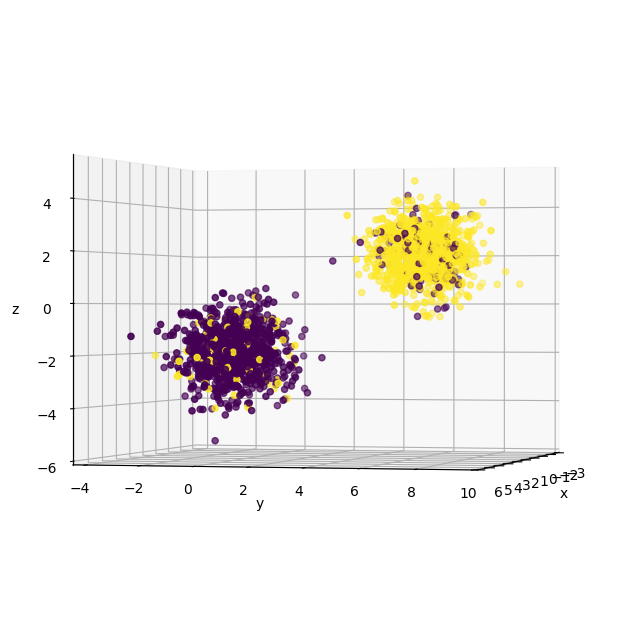

In [17]:
means = [[3, 0], [0, 6]]
sigmas = [0.9, 0.9]
n = 100
x, labels = mixGauss(means, sigmas, n)

fig = plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], s=70, c=labels)
plt.show()

noisylabels = label_noise(0.1, labels)

fig = plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], s=70, c=noisylabels)
plt.show()

means = [[3, 0, -2], [0, 6, 2]]
sigmas = [0.9, 0.9]
n = 1000
x, labels = mixGauss(means, sigmas, n)
noisylabels = label_noise(0.1, labels)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(x[:, 0], x[:, 1], x[:, 2], c=noisylabels)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 15)
plt.show()

## Exercise 2
Create a dataset of n = 1000 points laying on a swiss roll and plot them both in 2d and 3d.


In [18]:
def swiss_roll(n):
    """
    Parameters:
    n: int
        Numbers of points to generate
    """

    data = np.zeros((n, 3))
    phi = np.random.uniform(1.5*np.pi, 4.5*np.pi, n)
    psi = np.random.uniform(0, 100, n)
    data[:, 0] = phi*np.cos(phi)
    data[:, 1] = phi*np.sin(phi)
    data[:, 2] = psi
    return data

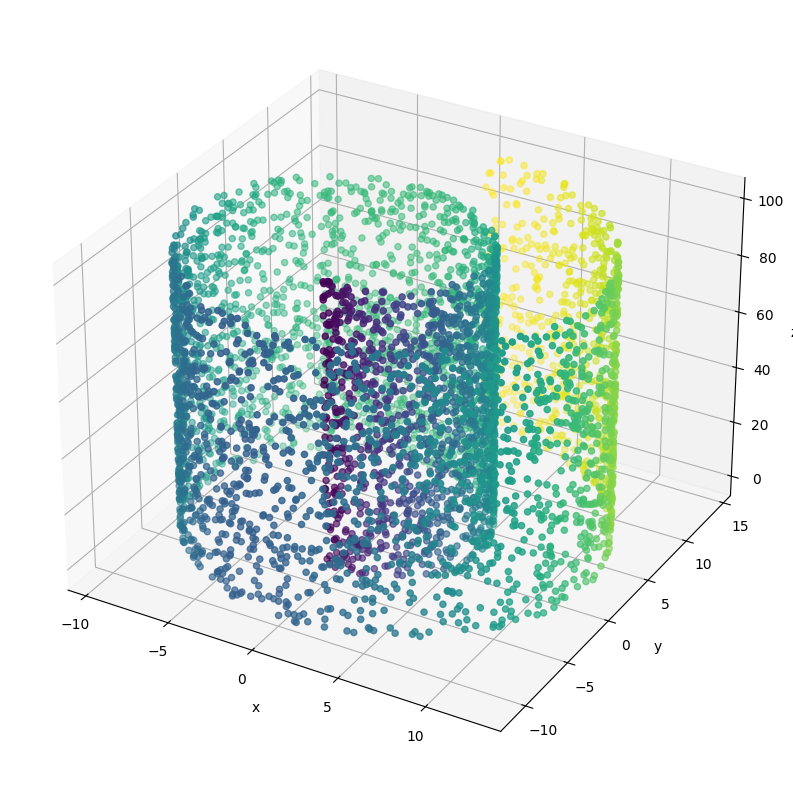

In [19]:
x = swiss_roll(5000)
clr = np.sqrt(np.square(x[:, 0])+np.square(x[:, 1]+5))

plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(x[:, 0], x[:, 1], x[:, 2], c=clr)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')

plt.show()

## Exercise 3
Find the equation describing the Klein bottle problem. Generate a dataset and plot it as in Exercise 2.

In [20]:
def klein_bottle(n):
    """
    Paramterers:
    n: int
        Number of points to generate
    """
    data = np.zeros((n,3))
    u = np.random.uniform(0, np.pi, n)
    v = np.random.uniform(0, 2 * np.pi, n)

    data[:,0] = -2/15*np.cos(u)*(3*np.cos(v)-30*np.sin(u)+90 * np.cos(u)**4 * np.sin(u) -
                     60*np.cos(u) ** 6*np.sin(u)+5 * np.cos(u)*np.cos(v)*np.sin(u))
    data[:,1] = -1/15*np.sin(u)*(3*np.cos(v)-3*np.cos(u) ** 2*np.cos(v)-48*np.cos(u) ** 4 * np.cos(v)+48 * np.cos(u) ** 6*np.cos(v)-60*np.sin(u)+5 * np.cos(u)
                     * np.cos(v)*np.sin(u)-5*np.cos(u) ** 3*np.cos(v) * np.sin(u)-80*np.cos(u) ** 5*np.cos(v)*np.sin(u)+80 * np.cos(u) ** 7*np.cos(v)*np.sin(u))
    data[:,2] = 2/15*(3+5*np.cos(u)*np.sin(u))*np.sin(v)
    return data

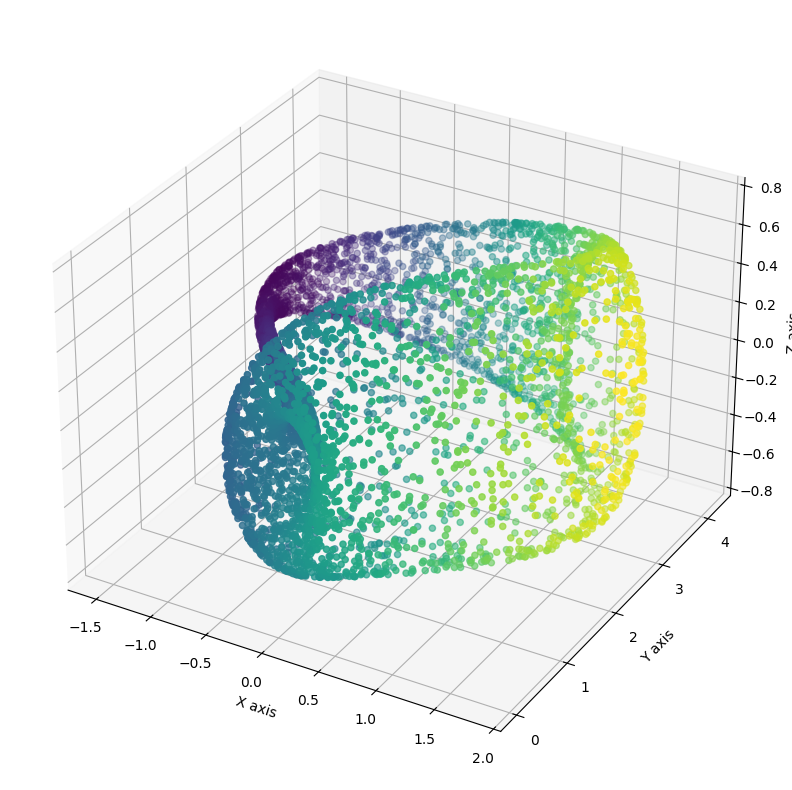

In [21]:
x = klein_bottle(5000)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:,0])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()